In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

### **Chargement du jeu de données**
Les données utilisées pour ce projet proviennent de la datawarehouse de criteo et portent sur les caractéritiques des clics intentionnels et non intentionnels

In [121]:
ClicConfirmed=pd.read_csv('D:/STATAPP/DATA/confirmed_clicks.csv')
DataBanner=pd.read_csv('D:/STATAPP/DATA/banner_first_clicks.csv')

In [122]:
DataBanner.head()
# la taille du dataset
DataBanner.shape
#Liste des variables 
print(DataBanner.columns)
print(DataBanner.dtypes)
DataBanner["nb_products_in_banner"]
ClicConfirmed.head()

Index(['impression_id', 'host_platform', 'click_time', 'duplo_click_zone',
       'freeze_mode', 'click_zone', 'click_x', 'click_y', 'click_time_origin',
       'average_framerate', 'last_second_framerate', 'viewability_time',
       'device_type', 'display_env', 'display_timestamp', 'contextid',
       'navigationid', 'ngb_layout_v', 'is_coupon_visible', 'product_view_id',
       'banner_type', 'layout_provider', 'is_interstitial', 'display_width',
       'display_height', 'nb_products_in_banner'],
      dtype='object')
impression_id            object
host_platform            object
click_time                int64
duplo_click_zone          int64
freeze_mode               int64
click_zone                int64
click_x                   int64
click_y                   int64
click_time_origin         int64
average_framerate         int64
last_second_framerate     int64
viewability_time          int64
device_type              object
display_env              object
display_timestamp        

,impression_id,click_timestamp
0,5eefbb2055886545b9bc7dbdc9887a7b,1592773030
1,5eefbb2055886545b9bc7dbdc9887a7b,1592773030
2,5eeff157e6aed86f1ae5087183782617,1592783215
3,5eeff157e6aed86f1ae5087183782617,1592783215
4,5eeff298fd2cd6af6b8134229342e003,1592783530


**Cette base de données contient 26 variables**:

*   *impression_id*: ID de l'affiche publicitaire
*   *host_platform*: région où l'affiche publicitaire a eu lieu
*   *click_time*: Heure du clic depuis l'apparition de la banière
*   *duplo_click_zone*: Élément HTML cliqué (Logo, ProdctImage, CTA, etc.)
*   *freeze_mode*: Les animations sont-elles gelées ou non ?  le système est "gelé", c'est-à-dire qu'il ne répond plus aux différents dispositifs d'entrée du à une surcharge de la memoire, du processeur ...
*   *click_zone*: zone du clic (0 = logo, 1 = coupon, 2 = product) coupon:  une bannière de notification en bas de l'écran avec une promotion spéciale.
*   *click_x*: coordonnée horizontale du clic, en pixels
*   *click_y*: coordonnée verticale du clic, en pixels
*   *click_time_origin*: Durée du clic depuis l'initialisation de la bannière
*   *average_framerate*: Taux de rafraîchissement moyen depuis que la bannière était visible jusqu'au clic
*   *last_second_framerate*: Taux de rafraîchissement mesuré pendant la dernière seconde avant le clic
*   *viewability_time*: Temps écoulé entre le moment où la bannière est visible et le clic (en millisecondes)
*   *device_type*: Type d'appareil (ordinateur de bureau, Android, Iphone, etc.)
*   *display_env*: App or web. l'ffiche publicitaire apparait sur une application ou un site web
*   *display_timestamp*: Horodatage de l'affichage, instant auquel l'affichage a été effectuée. Un timestamp peut aussi désigner un compteur numérique représentant une quantité de temps écoulée depuis un instant de référence.
*   *contextid*: l'identifiant du contexte de l'utilisateur (un contexte élevé équivaut à une utilisation plus engagée)
*   *navigationid*: Navigation à l'intérieur de la bannière. 0 = Neutre, 1= Diaporama avec flèche, 4 = Diaporama, 5 = Diaporama avec points, NULL = bannière duplo non standard: la bannière est défilée sous forme de diapo avec des flèches, des points en bas  de l'affiche, 
*   *ngb_layout_v*: ID de la grille (= structure de la présentation des produits)
*   *is_coupon_visible*: Si un coupon est affiché
*   *product_view_id*: Mise en page de chaque vue de produit (cta, image, prix, etc.)
*   *banner_type*: 7 = HTML, 6 = bannière Compatible avec les blocs publicitaires, 9 = Natifs, ... Le native advertising désigne un type de publicité qui par sa forme, son emplacement et son contenu ressemble et s'intègre fortement aux contenus éditoriaux diffusés habituellement par le site support qui la diffuse. 
*   *layout_provider*: 0 = Duplo, 1 = Fourni par le client, 2 = Vidéo, 3 = Image statique, 4 = Studio, NULL = bannière non HTML
*   *is_interstitial*: 1 si la bannière prend tout l'écran (lors de l'ouverture d'une application de jeu par exemple)
*   *display_width*: largeur_de_l'affichage en pixel
*   *display_height*: hauteur de l'affiche
*   *nb_products_in_banner*: nombre de produit sur l'affiche

## **1. Exploration du jeu de données**

Cette partie nous permet d'avoir un appercu sur la distribution des variables présentes dans notre base de données.

In [46]:
DataBanner.head(5)

,impression_id,host_platform,click_time,duplo_click_zone,freeze_mode,click_zone,click_x,click_y,click_time_origin,average_framerate,...,ngb_layout_v,is_coupon_visible,product_view_id,banner_type,layout_provider,is_interstitial,display_width,display_height,nb_products_in_banner,confirmed
0,5eebdcb06628b66934586d3c7d260f9b,EU,65563,4,1,4,74,134,69737,51,...,333564,0,333354,7,0,0,300,600,12,Nconfirm
1,5eebdcb06628b66934586d3c7d260f9b,EU,74728,4,1,4,66,131,78901,50,...,333564,0,333354,7,0,0,300,600,12,Nconfirm
2,5eebdfcc04cf02afb7eab76d1e68a3ee,EU,13311,4,0,4,51,199,14686,50,...,333564,0,333354,7,0,0,300,250,8,Nconfirm
3,5eebdd4327ec1a41da3c277a12e3403c,EU,69596,4,1,4,72,323,70357,59,...,333563,0,333570,7,0,0,424,353,6,confirm
4,5eebdf15c01163e2b92900f668ec8c9c,EU,172110,4,1,4,162,198,174916,57,...,333519,0,333354,7,0,0,336,280,6,Nconfirm


In [4]:
#Test sur l'existance des valeurs manquantes
all(DataBanner.notnull())

True

In [23]:
#sum up des variables quantitatives
round(DataBanner.describe(),2)

,click_time,duplo_click_zone,freeze_mode,click_zone,click_x,click_y,click_time_origin,average_framerate,last_second_framerate,viewability_time,...,navigationid,ngb_layout_v,is_coupon_visible,product_view_id,banner_type,layout_provider,is_interstitial,display_width,display_height,nb_products_in_banner
count,682712.00,682712.00,682712.00,682712.00,682712.00,682712.00,682712.00,6.827120e+05,6.827120e+05,682712.00,...,682712.00,682712.00,682712.0,682712.00,682712.0,682712.0,682712.00,682712.00,682712.00,682712.00
mean,62433.15,8.94,0.21,8.94,197.15,154.16,69359.07,3.180970e+03,3.183290e+03,32080.08,...,3.00,333490.35,0.2,333506.07,7.0,0.0,0.13,373.71,331.15,12.62
std,146243.24,13.19,0.41,13.19,179.33,177.20,173443.63,2.599029e+06,2.599029e+06,99200.90,...,2.96,83.60,0.4,2708.60,0.0,0.0,0.34,168.67,230.50,11.76
min,-1.00,1.00,0.00,1.00,-21264.00,-20732.00,0.00,-1.000000e+00,-1.000000e+00,-1.00,...,0.00,333346.00,0.0,0.00,7.0,0.0,0.00,80.00,41.00,1.00
25%,9718.00,4.00,0.00,4.00,93.00,45.00,12938.00,2.000000e+01,2.100000e+01,3785.00,...,0.00,333372.00,0.0,333519.00,7.0,0.0,0.00,300.00,250.00,4.00
50%,19877.00,5.00,0.00,5.00,178.00,116.00,24673.00,3.800000e+01,4.700000e+01,11359.00,...,4.00,333519.00,0.0,333556.00,7.0,0.0,0.00,320.00,250.00,9.00
75%,54150.25,7.00,0.00,7.00,256.00,205.00,60000.00,5.500000e+01,5.800000e+01,21332.25,...,7.00,333564.00,0.0,333570.00,7.0,0.0,0.00,360.00,480.00,18.00
max,3431963.00,68.00,1.00,68.00,1518.00,1522.00,30540810.00,2.147484e+09,2.147484e+09,3357492.00,...,7.00,333645.00,1.0,333632.00,7.0,0.0,1.00,2340.00,2961.00,63.00


##Dans  la base de données, on compte 102 affiches publicitaires dupliquées 

In [123]:
print("On compte {} duplicates.".format(DataBanner.duplicated().sum()))
print(DataBanner.shape)
##suppression des doublons
DataBanner=DataBanner.drop_duplicates(keep='last')
print(DataBanner.shape)

On compte 102 duplicates.
(682712, 26)
(682610, 26)


### AJOUT DE LA VARIABLE clic confirmé
##### Il ya 213210 Clics confirmés dans la base globale sur 300203 clics confirmés initiaux

In [124]:
## A jout de la variable confirmée
DataBanner["confirmed"]=np.where(DataBanner["impression_id"].isin(ClicConfirmed['impression_id']), 'confirm', 'Nconfirm')
print(ClicConfirmed.shape)
DataBanner["confirmed"].describe()

(300203, 2)


count       682610
unique           2
top       Nconfirm
freq        469400
Name: confirmed, dtype: object

In [ ]:
df["sclicT"]=np.log()
sns.distplot(df.loc[df.confirmed=="Nconfirm"][var], kde=True, bins=50, color='chartreuse')
sns.distplot(df.loc[df.confirmed=="confirm"][var], kde=True, bins=50, color='lightcoral')

### **1.1 Staistiques descriptives univariées et bivariées**

In [133]:
def Visualisation(df,var):
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    sns.distplot(df[var],bins=50,kde=True)
    plt.title('Density')
    plt.subplot(1,2,2)
    sns.set_style("whitegrid")
    df["logclic"]=np.log(df[var][0<df[var]])
    sns.set_style("whitegrid")
    sns.boxplot(x="confirmed",y="logclic", data=df)
    plt.title("\nDistribution de " + var + " suivant la nature du click")
    plt.legend(['Click confirmé', "click Nonconfirmé"])
    plt.xlabel(var)
    return plt.show()

def VisualisationN(df,var):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    ax = df[var].value_counts(normalize=True).sort_values().plot(kind='barh',title="répartition des clics suivant la " + var,color="lightcoral", fontsize=15)
    ## Ajout des proportions sur le graphe
    totals = []
    ## ajouter les valeurs individuelles dans la liste
    for i in ax.patches:
        totals.append(i.get_width())
    total = sum(totals)
    # valeur des barres individuelles
    for i in ax.patches:
        ax.text(x=i.get_width(), y=i.get_y()+.35, 
                s=str(round((i.get_width()/total)*100, 2))+'%', 
                fontsize=10, color='black')
        
    plt.subplot(1,2,2)
    sns.countplot(x = var, hue = "confirmed", data = df, palette = 'magma')
    #account_proportions = ((df.groupby(['Country', 'Gender']).Premium_account.sum()/df.Premium_account.sum()).unstack('Gender'))
    plt.title(var + " en fonction de la nature du clic")
    plt.show(block=True)
    return plt.show()


### Description des variables host_platform, freeze_zone, device_type

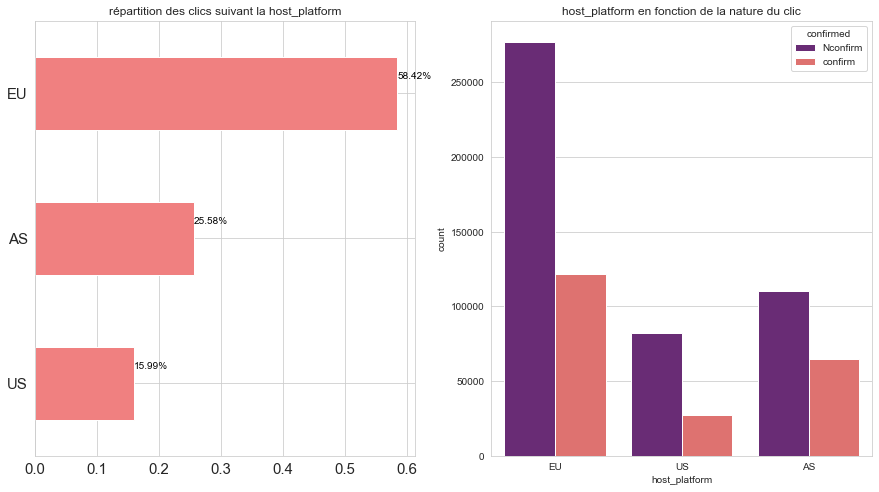

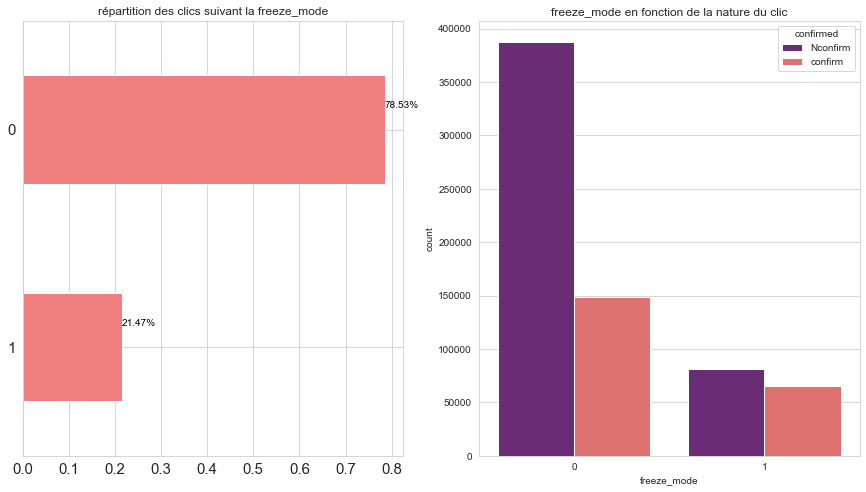

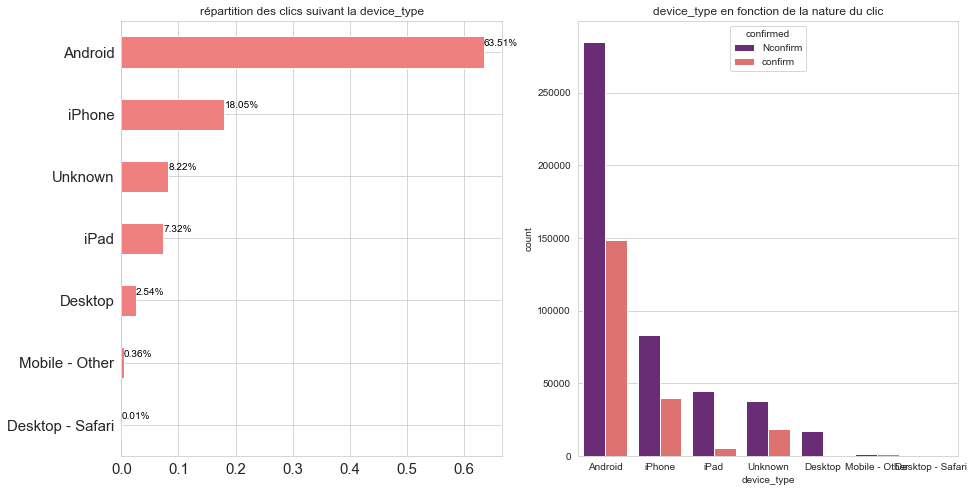

In [146]:
## visualisation
VisualisationN(df,"host_platform")
VisualisationN(df,"freeze_mode")
VisualisationN(df,"device_type")

#### host_platform
* un peu Plus de la moitié des clicks de notre base ont eu lieu en Europe, suivi par l Asie et les Etats unis. les clicks confirmés s'effectuent les plus en Asie qu'en et aux états unis
#### freeze_zone
* 78% des animations ne sont pas gelées. Pour les animations gelées, les clicks confirmés sont plus récurrents
#### device_type
*  Plus de la moitié (63%) des clicks de notre base s'effectue sur un Android, suivi par le Iphone (18%). seulement 2.5% sont effectués sur un Desktop
* les clicks confirmés s effectuent les plus sur un Android et très peu sur un Destop

## Description des variables click_time, click_time_origin, viewability_time

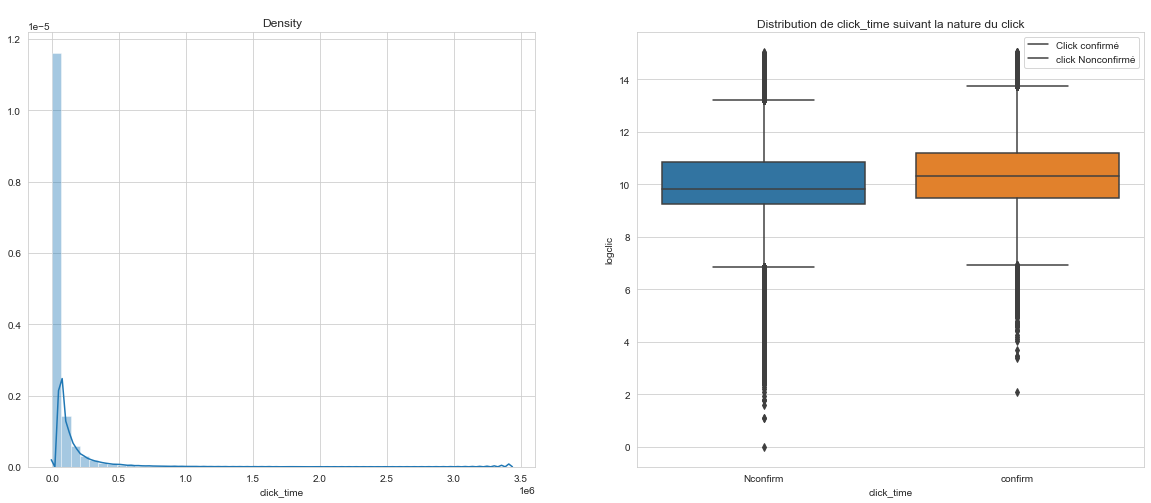

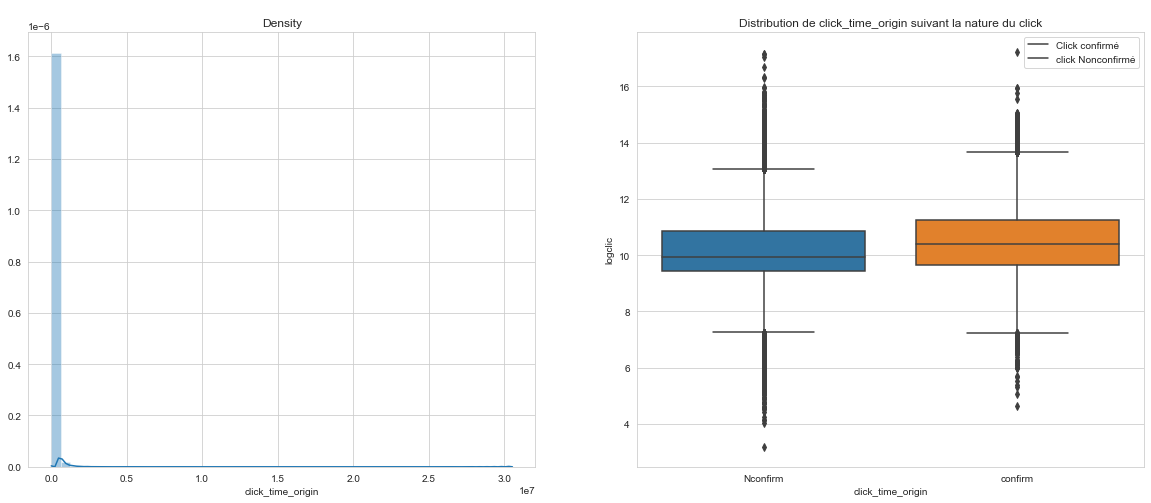

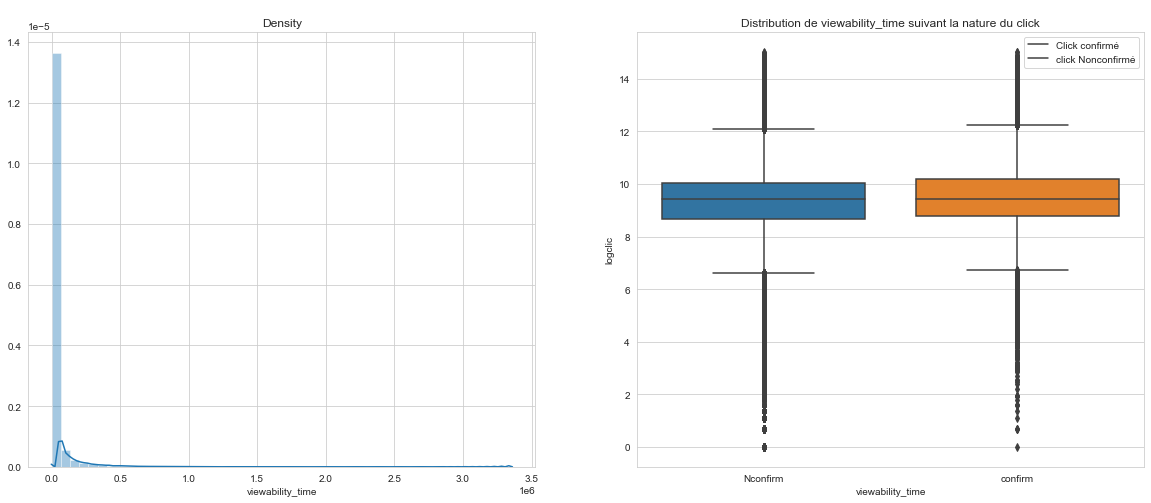

In [145]:
Visualisation(df,"click_time")
Visualisation(df,"click_time_origin")
Visualisation(df,"viewability_time")

### 

## click_time 
* distribution très asymetrique, étalée vers la droite
* En moyenne, les clicks s'effectuent 62434,75 milisecondes après l'apparition de la bannière. le temps maximal est de 3 431 963 milisecondes. plus de la moitié des clicks s'effectuent 19875 milisecondes après l'apparition de la bannière.
* la distribution étant très étalée. nous avons appliqué le logarithme sur la variable afin de mieux observer les disparités entre les clics confirmés et non confirmés
* Dans l'ensemble, les clics confimés mettent plus de temps à s'effectuer que les clics non confirmés

## click_time_origin
* distribution très asymetrique, étalée vers la droite
* En moyenne, un clic s'effectue 69359,36 ms après l'initialisation de la bannière
* en  moyenne les cliks confimés mettent plus de temps à s'effectuer après l'initialisation de la bannière que les non confirmés

### viewability_time
* distribution très asymetrique, étalée vers la droite
* En moyenne, il s'écoule 32081,42 milisecondes entre le moment où la bannière est visible et le clic 
* Globalement, le temps écoulé entre le moment où la bannière est visible et le clic diffère peu d'un clic confirmé à un clic non confirmé

### duplo_click_zone: Élément HTML cliqué (Logo, ProdctImage, CTA, etc.)

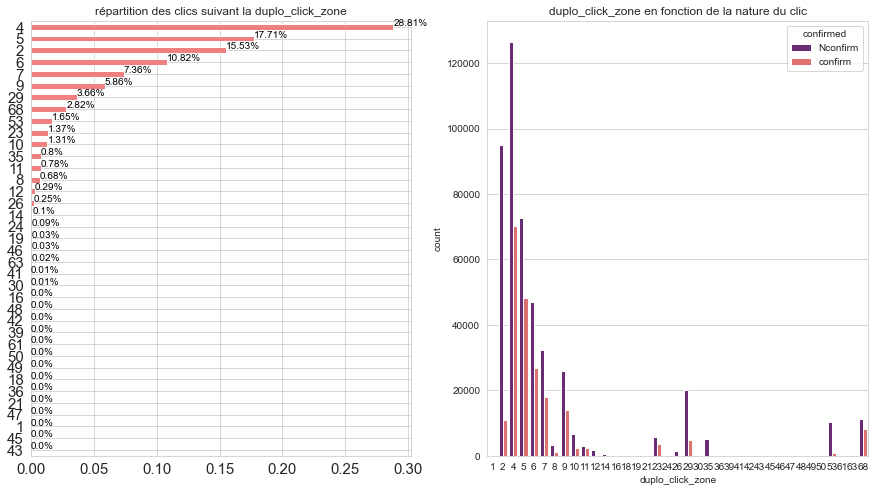

In [137]:
## visualisation
VisualisationN(df,"duplo_click_zone")

* les modalités ne sont pas libellées.    
* la base contient 37 duplo click zone

### click_x et clic_y: coordonnée horizontale et verticale du clic, en pixels

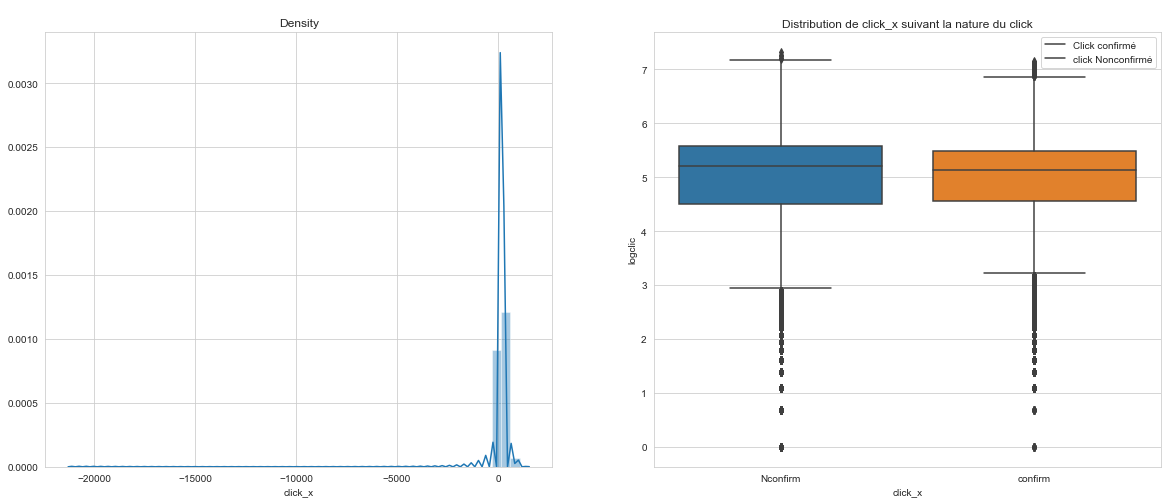

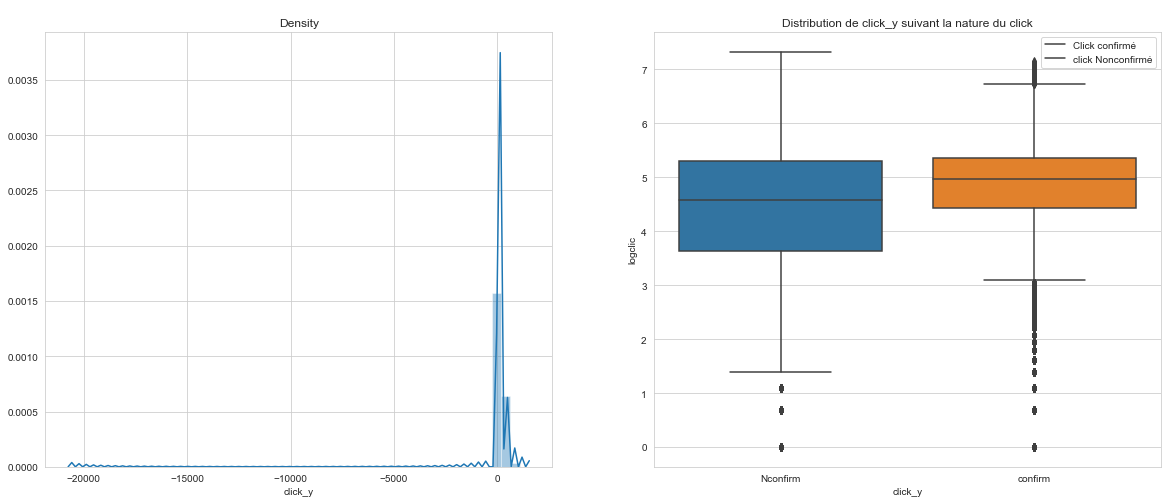

In [141]:
Visualisation(df,"click_x")
Visualisation(df,"click_y")

## position horizontale et verticale
* distributions des variables très asymetriques, étalée vers la gauche 
* Globalement, la cordonnée horizontale des clics confirmés diffère peu de celle des clics non confirmés. Par contre, la coordonnée verticale des clics confirmés semble etre plus importante. 

### Description des variables display_env, navigationid

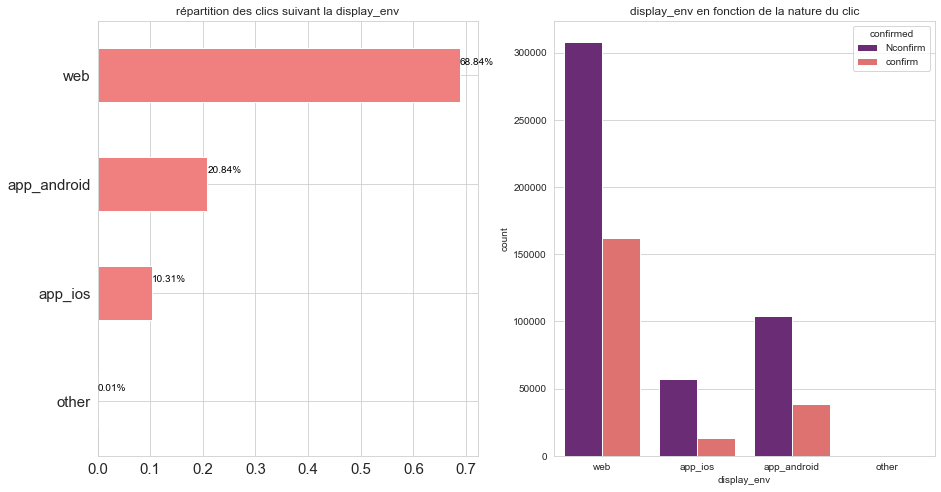

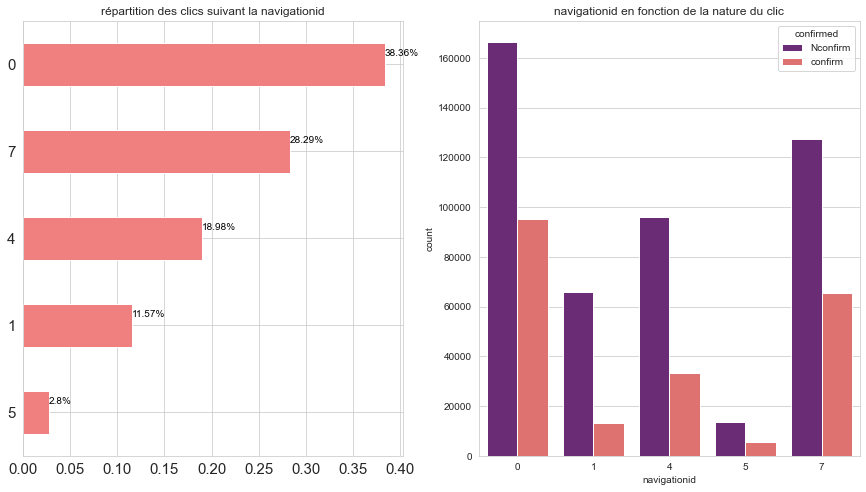

In [147]:
VisualisationN(df,"display_env")
VisualisationN(df,"navigationid")

### display_env
*  Plus de la moitié (69%) des clicks de notre base s'effectue sur une page web et 20% sur une application Android. Aussi, les clicks confirmés s'effectuent les plus sur une page web

### navigationid
* 0 = Neutre, 1= Diaporama avec flèche, 4 = Diaporama, 5 = Diaporama avec points, NULL = bannière duplo non standard  
*  38% des clics ce sont effectués par navigation neutre à l'intérieur de la bannière, 28% (7), 19% par navigation en diaporama. seulement 5% des clics ce sont effectués par navigation en diaporama avec des points
* la proportion de clics confirmés diffèrent peu d'un type de navigation à l'autre à l'exception de ceux effectués par navigation en diaporama avec des fleches (faible proportion de clics confirmés apr rapport aux autres)
* 7 n'a pas d'etiquette 

## contextid (un contexte élevé équivaut à une utilisation plus engagée)

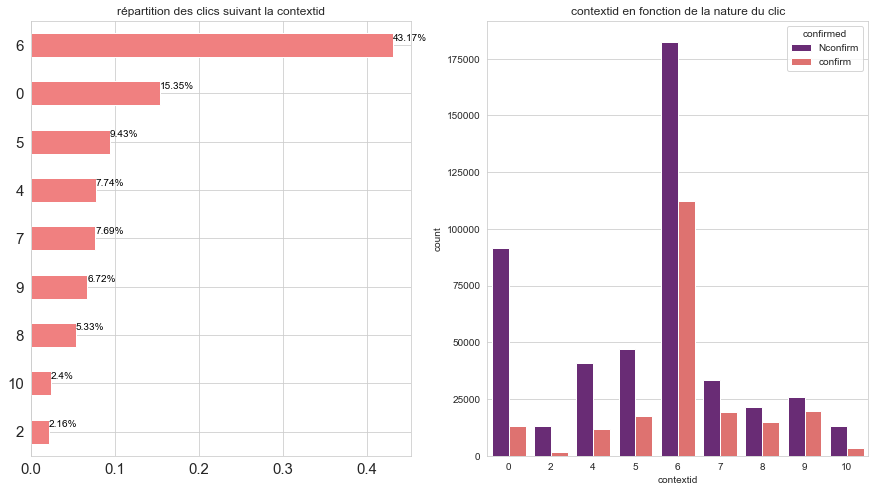

In [148]:
VisualisationN(df,"contextid")

*  43% des clicks sont effectués par des utilisateurs ayant un contexte égal à 6. Par contre, 15% des clicks sont effectués par des utilisateurs ayant un contexte nul. Ce sont les moins engagés. 
* Par ailleurs, les clicks confirmés s'effectuent les plus par les utilisateurs de contexte 6 que ceux de contexte nul

### Description des variables is_coupon_visible, banner_type, layout_provider,is_interstitial

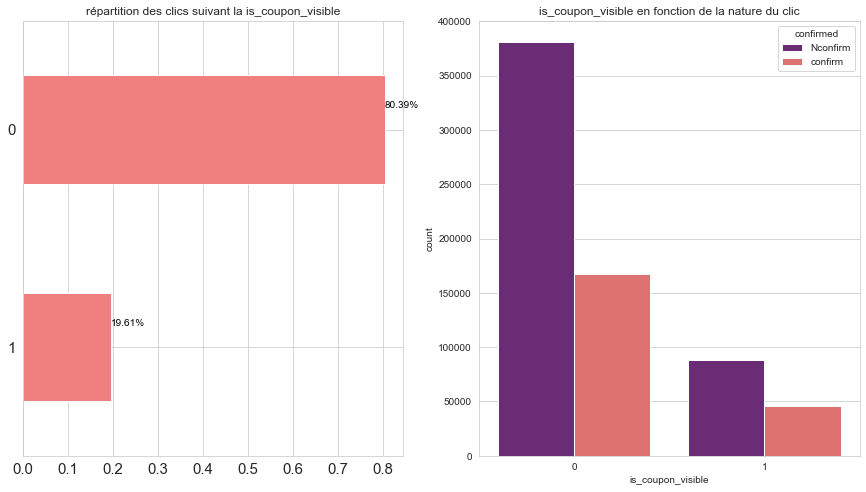

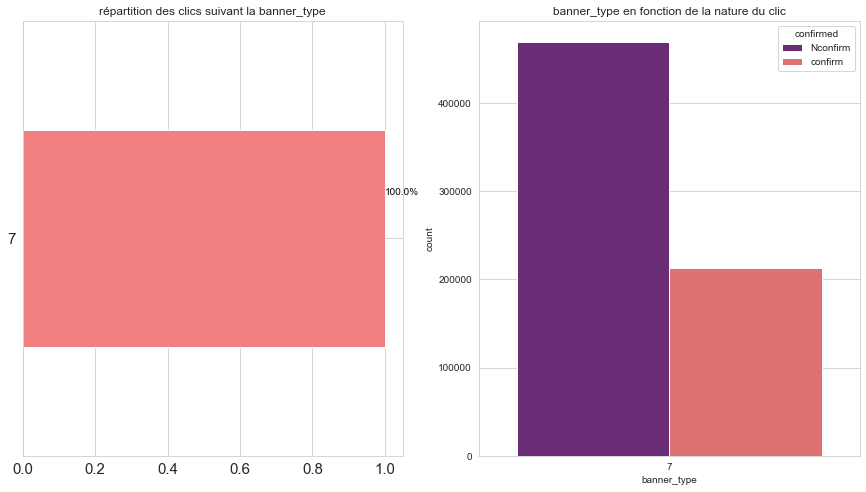

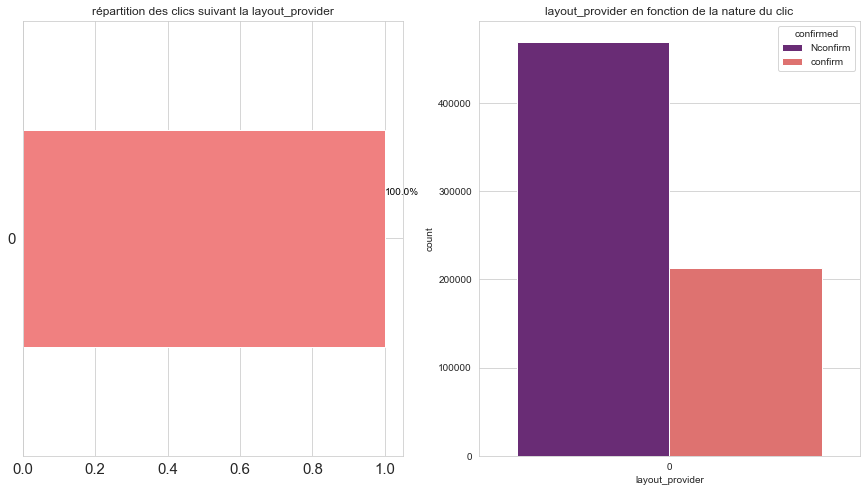

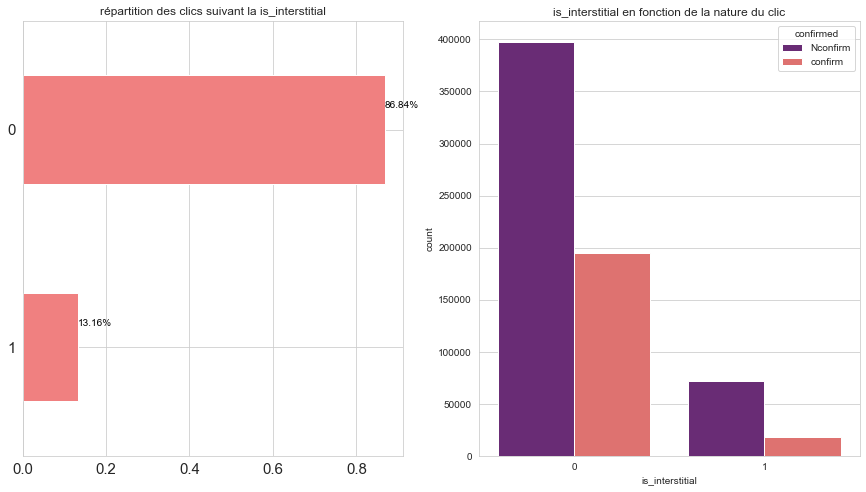

In [149]:
VisualisationN(df,"is_coupon_visible")
VisualisationN(df,"banner_type")
VisualisationN(df,"layout_provider")
VisualisationN(df,"is_interstitial")

## is_coupon_visible: Si un coupon est affiché
* un coupon n'était pas visible pour 80% des clics de notre base se sont effectués. Les clics confirmés semblent avoir plus lieu lorsqu'un coupon est visible
## banner_type
* Toutes les bannières sont de type HTML
## layout_provider
* Toutes les bannières sont de type Duplo
## is_interstitial
* 13% des clics se sont effectués sur des bannières en plein écran. Les clics confirmés sont plus fréquents pour des bannières qui ne s'affichent pas en plein écran

## Description des variables display_width, display_height

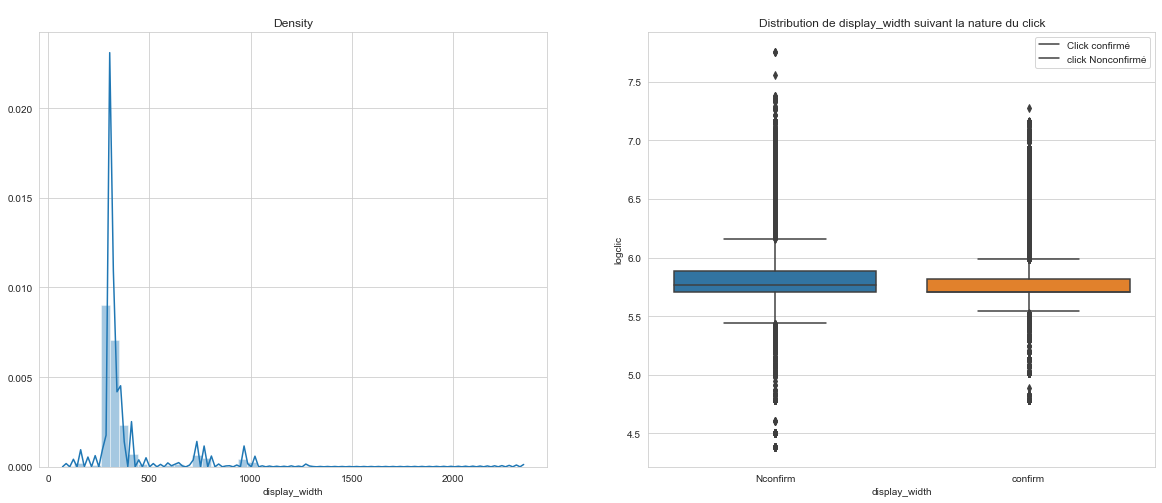

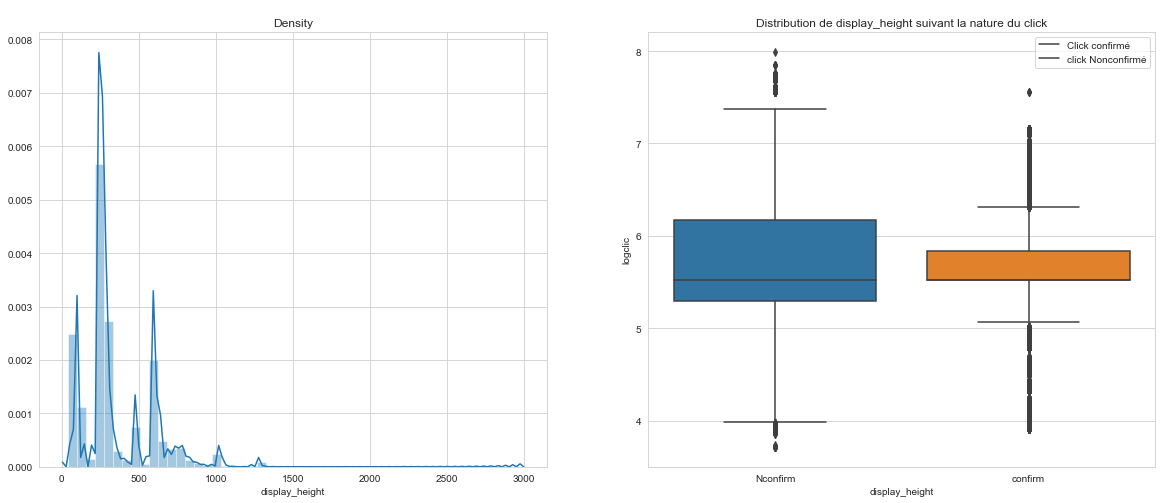

display_width
count    682610.000000
mean        373.708292
std         168.678167
min          80.000000
25%         300.000000
50%         320.000000
75%         360.000000
max        2340.000000
Name: display_width, dtype: float64
display_height
count    682610.000000
mean        331.152062
std         230.499722
min          41.000000
25%         250.000000
50%         250.000000
75%         480.000000
max        2961.000000
Name: display_height, dtype: float64


In [152]:
Visualisation(df,"display_width")
Visualisation(df,"display_height")
print("display_width")
print(df.display_width.describe())
print("display_height")
print(df.display_height.describe())

* En moyenne, les clics se sont effectués sur des affiches de largeur 373 pixel et de hauteur 331 pixel. Globalement, les clics confirmés semblent s'effectuer sur des affiches plus petite (en terme de dimensions) que les clics non confirmés. 

## *nb_products_in_banner*: nombre de produit sur l'affiche

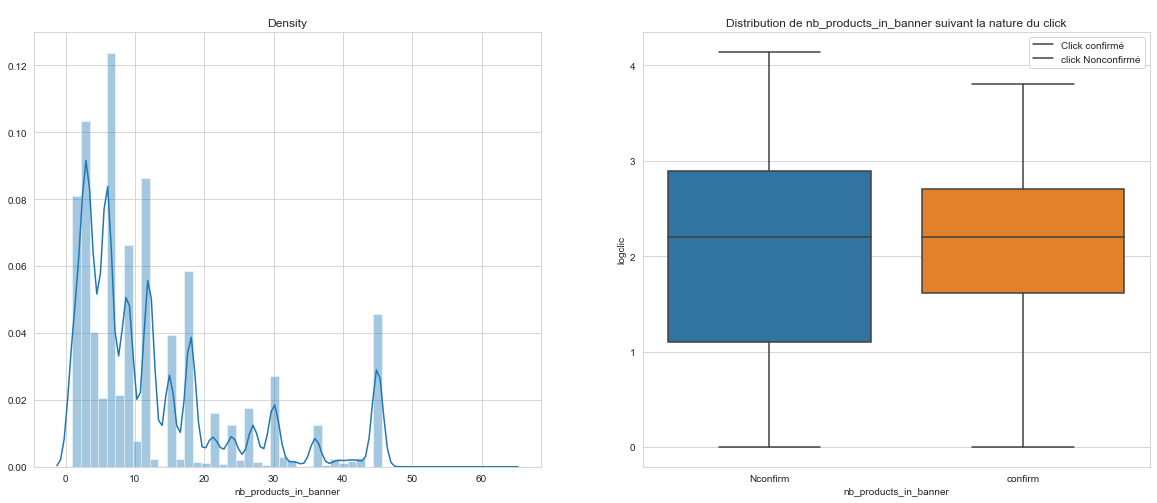

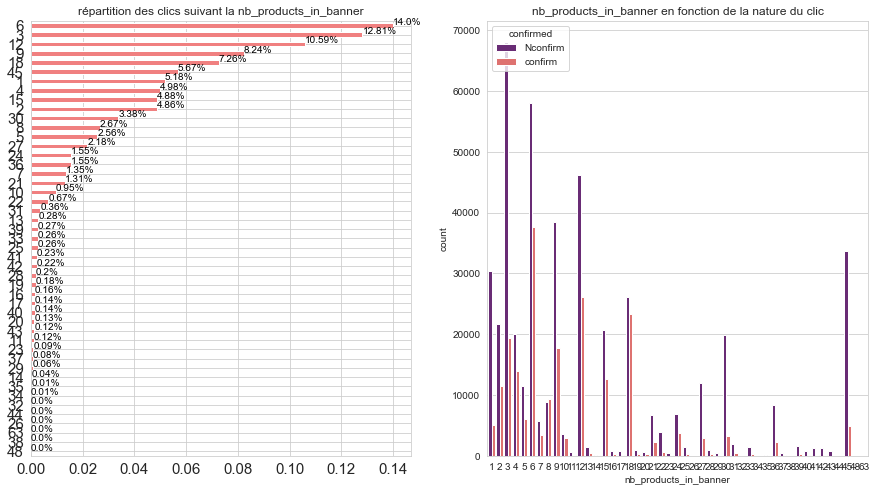

In [151]:
Visualisation(df,"nb_products_in_banner")
VisualisationN(df,"nb_products_in_banner")

* possibilité de valeurs abbérantes ou éronnés car il existent des affiches ayant plus de 20 produits.
* 14% des clics ont eu lieu sur des bannières ayant 6 produits
* le nombre de produits ne semble avoir d'influence sur la nature du clic